In [1]:
"""Zadanie 1"""

'Zadanie 1'

In [1]:
import random
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
def polynomial_n_squared(a:list, x:float):
    """Double loop, that's why n^2"""
    result = 0
    c = 1
    for i in range(len(a)):
        result += a[i]*c
        c = 1
        for j in range(i+1):
            c *= x
    return result

print(polynomial_n_squared([0,1,2], 2.4))

13.92


In [3]:
def polynomial_n_logn(a:list,x:float):
    """Only one loop and raising x to the n power, so nlogn"""
    result = 0
    c = 1
    for i in range(len(a)):
        result += a[i]*c
        c *= x

    return result

print(polynomial_n_logn([0,1,2],2.4))

13.92


In [4]:
def polynomial_horner(a:list,x:float):
    """n adding and multiplying, so O(2n)"""
    i = len(a) - 1
    result = a[i-1] + x*a[i]
    for n in range(0,i-1):
        result *= x
        result += a[i-n-2]
    return result

print(polynomial_horner([0,1,2],2.4))

13.92


In [5]:
"""Zadanie 2"""

'Zadanie 2'

In [6]:
def example1(S):
    """Return the sum of the elements in sequence S."""
    start = time.time()
    n = len(S)
    total = 0
    for j in range(n):
        total += S[j]
    end = time.time()
    return total, end-start

In [7]:
def example2(S):
    """Return the sum of the elements with even index in sequence S."""
    start = time.time()
    n = len(S)
    total = 0
    for j in range(0, n, 2):
        total += S[j]
    end = time.time()
    return total, end-start

In [8]:
def example3(S):
    """Return the sum of the prex sums of sequence S."""
    start = time.time()
    n = len(S)
    total = 0
    for j in range(n):
        for k in range(1+j):
            total += S[k]
    end = time.time()
    return total, end-start

In [9]:
def example4(A, B): # assume that A and B have equal length
    """Return the number of elements in B equal to the sum of prex
        sums in A."""
    start = time.time()
    n = len(A)
    count = 0
    for i in range(n):
        total = 0
        for j in range(n):
            for k in range(1+j):
                total += A[k]
        if B[i] == total:
            count += 1
    end = time.time()
    return count, end-start

In [10]:
x2 = np.arange(1,700)
def func_x_3(x,a,b):
    return a*(x**3)+b*x

def func_x_2(x,a,b):
    return a*(x**2)+b

def func_x(x,a,b):
    return a*x+b


In [11]:
def main_for_2(func, lista, function):
    """Główna funkcja robiąca wykres punktowy dla sprawdzanej funkcji (func) dla różnej ilości danych (lista) i dostosowująca krzywą (function)"""
    """Nie wiedziałem jak ujednolicić jedną funkcję tak, żeby przyjmowała funkcje zarówno z jedną, jak i dwoma zmiennymi..."""
    """dlatego ta funkcja jest praktycznie powtórzona poniżej"""
    xt=[]
    t1=[]
    for i in lista:
        l1=[]
        l2=[]
        for j in range(i):
            l1.append(random.randint(1000,3000))
            l2.append(random.randint(1000,3000))

        t=time.process_time()
        wynik=func(l1,l2)
        t=time.process_time()-t
    
        xt.append(i)
        t1.append(t)

    popt, pcov = curve_fit(function,xt,t1)
    plt.plot(xt,t1,'ro', label="Dane")
    plt.plot(x2,function(x2,*popt),label="Hipoteza")
    plt.xlabel("Długość listy")
    plt.ylabel("Czas wykonania")
    plt.legend()
    plt.show

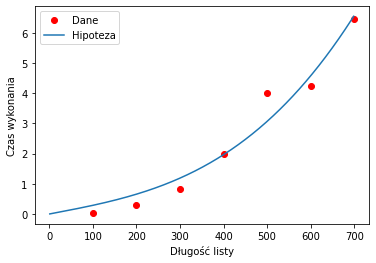

In [ ]:
analiza_4 = main_for_2(example4,[100,200,300,400,500,600,700,800,900],func_x_3)
#trochę poprawić

In [17]:
def main(func, lista, function, x3):
    xt=[]
    t1=[]
    for i in lista:
        l=[]
        for j in range(i):
            l.append(random.randint(1000,3000))

        t=time.process_time()
        wynik=func(l)
        t=time.process_time()-t
    
        xt.append(i)
        t1.append(t)

    popt, pcov = curve_fit(function,xt,t1)
    plt.plot(xt,t1,'ro', label="Dane")
    plt.plot(x3,function(x3,*popt),label="Hipoteza")
    plt.xlabel("Długość listy")
    plt.ylabel("Czas wykonania")
    plt.legend()
    plt.show

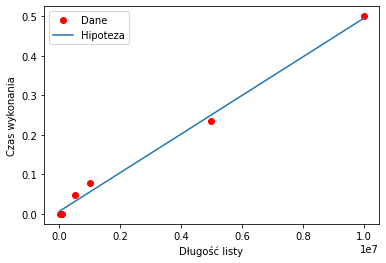

In [36]:
b=5
n=[10000,50000,100000,500000,1000000,5000000,10000000]
analiza_1 = main(example1,n,func_x,np.arange(10000000))

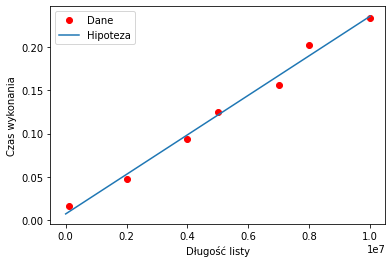

In [28]:
n=[20*(10**b),30*(10**b),50*(10**b),70*(10**b),80*(10**b),10**(b+2)]
analiza_2 = main(example2,n,func_x,np.arange(10**(b+2)))

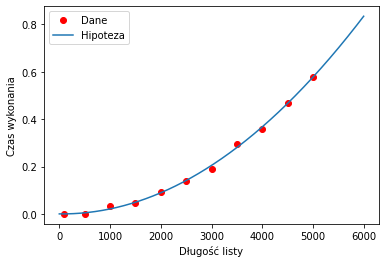

In [ ]:
n=[100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
analiza_3 = main(example3,n,func_x_2,np.arange(6000))

In [ ]:
"""Zadanie 3"""

'Zadanie 3'

In [32]:
def funclog(x,a,b):
    return a*(x*np.log(x))+b

In [33]:
def main_log(func, lista, function, x3):
    xt=[]
    t1=[]
    for i in lista:
        l=[]
        for j in range(i):
            l.append(random.randint(1000,5000))

        t=time.process_time()
        wynik=func(l)
        t=time.process_time()-t
    
        xt.append(i)
        t1.append(t)

    popt, pcov = curve_fit(function,xt,t1)
    plt.plot(xt,t1,'ro', label="Dane")
    plt.plot(x3,function(x3,*popt),label="Hipoteza")
    plt.xlabel("Długość listy")
    plt.ylabel("Czas wykonania")
    plt.yscale("log")
    plt.legend()
    plt.show

C:\Users\48511\AppData\Local\Temp\ipykernel_13380\4169115735.py:2: RuntimeWarning: divide by zero encountered in log
  return a*(x*np.log(x))+b
C:\Users\48511\AppData\Local\Temp\ipykernel_13380\4169115735.py:2: RuntimeWarning: invalid value encountered in multiply
  return a*(x*np.log(x))+b


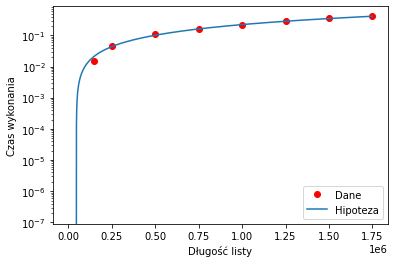

In [34]:
main_log(sorted,[150000,250000,500000,750000,1000000,1250000,1500000,1750000],funclog,np.arange(1750000))